In [1]:
from topgrid_morl.utils.MORL_analysis_utils import  plot_grouped_bar_plot, plot_total_sums, plot_3d_mean_std, plot_mean_std_rewards, plot_mean_std_total_steps, normalize_reward_matrix, generate_variable_name, plot_multiple_subplots
from topgrid_morl.utils.MO_PPO_train_utils import load_saved_data
import itertools
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\thoma\anaconda3\envs\TOPGRID_MORL\Lib\site-packages\grid2op\Backend\pandaPowerBackend.py:32: UserWarning: Numba cannot be loaded. You will gain possibly massive speed if installing it by 
	c:\Users\thoma\anaconda3\envs\TOPGRID_MORL\python.exe -m pip install numba

  warnings.warn(


Set Parameters

In [2]:
num_episodes = 5
num_episodes_list = [num_episodes]
weights_list = [
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
]
results_dir = "training_results_5bus"
num_seeds = 10
seeds = np.arange(0,num_seeds)
reward_dim = 3
num_weights = 3

Load Data

In [3]:
loaded_data = {}
do_nothing = True
# Loop through all combinations of num_episodes and weights
for num_episodes, weights, seed in itertools.product(num_episodes_list, weights_list, seeds):
    # Load the reward matrix and actions
    reward_matrix, actions, total_steps, params, donothing_reward_matrix, donothing_total_steps = load_saved_data(weights=weights, results_dir=results_dir, seed=seed, num_episodes=num_episodes)
    
    # Generate variable names based on the specifications
    reward_var_name = generate_variable_name("reward_matrix", num_episodes, weights,seed=seed)
    actions_var_name = generate_variable_name("actions", num_episodes, weights,seed=seed)
    total_steps_var_name = generate_variable_name("total_steps", num_episodes, weights, seed=seed)
    if do_nothing == True:
        donothing_reward_var_name = generate_variable_name("donothing_reward_matrix", num_episodes, weights, seed=seed)
        donothing_total_steps_var_name = generate_variable_name("donothing_total_steps", num_episodes, weights, seed=seed)
    
    # Store the data in the dictionary
    loaded_data[reward_var_name] = reward_matrix
    loaded_data[actions_var_name] = actions
    loaded_data[total_steps_var_name] = total_steps
    if do_nothing == True:
        loaded_data[donothing_reward_var_name] = donothing_reward_matrix
        loaded_data[donothing_total_steps_var_name] = donothing_total_steps

Loaded results from training_results_5bus\results_weights_1_0_0_episodes_5_seed_0.npz
Loaded model from training_results_5bus\model_weights_1_0_0_episodes_5_seed_0.pth
Loaded parameters from training_results_5bus\params_weights_1_0_0_episodes_5_seed_0.json
Loaded DoNothing reward matrix from training_results_5bus\DoNothing_reward_matrix_5_episodes_0.npy
Loaded DoNothing total steps from training_results_5bus\DoNothing_total_steps_5_episodes_0.npy
Loaded results from training_results_5bus\results_weights_1_0_0_episodes_5_seed_1.npz
Loaded model from training_results_5bus\model_weights_1_0_0_episodes_5_seed_1.pth
Loaded parameters from training_results_5bus\params_weights_1_0_0_episodes_5_seed_1.json
Loaded DoNothing reward matrix from training_results_5bus\DoNothing_reward_matrix_5_episodes_1.npy
Loaded DoNothing total steps from training_results_5bus\DoNothing_total_steps_5_episodes_1.npy
Loaded results from training_results_5bus\results_weights_1_0_0_episodes_5_seed_2.npz
Loaded model

Check keys

In [4]:
loaded_data.keys()

dict_keys(['reward_matrix_episodes_5_weights_1_0_0_seed_0', 'actions_episodes_5_weights_1_0_0_seed_0', 'total_steps_episodes_5_weights_1_0_0_seed_0', 'donothing_reward_matrix_episodes_5_weights_1_0_0_seed_0', 'donothing_total_steps_episodes_5_weights_1_0_0_seed_0', 'reward_matrix_episodes_5_weights_1_0_0_seed_1', 'actions_episodes_5_weights_1_0_0_seed_1', 'total_steps_episodes_5_weights_1_0_0_seed_1', 'donothing_reward_matrix_episodes_5_weights_1_0_0_seed_1', 'donothing_total_steps_episodes_5_weights_1_0_0_seed_1', 'reward_matrix_episodes_5_weights_1_0_0_seed_2', 'actions_episodes_5_weights_1_0_0_seed_2', 'total_steps_episodes_5_weights_1_0_0_seed_2', 'donothing_reward_matrix_episodes_5_weights_1_0_0_seed_2', 'donothing_total_steps_episodes_5_weights_1_0_0_seed_2', 'reward_matrix_episodes_5_weights_1_0_0_seed_3', 'actions_episodes_5_weights_1_0_0_seed_3', 'total_steps_episodes_5_weights_1_0_0_seed_3', 'donothing_reward_matrix_episodes_5_weights_1_0_0_seed_3', 'donothing_total_steps_epi

In [5]:
reward_matrix_1_0_0 = []
for seed in seeds: 
    name = f"reward_matrix_episodes_{num_episodes}_weights_1_0_0_seed_{seed}"
    reward_matrix_1_0_0.append(loaded_data[name])
reward_matrix_0_1_0 =[]
for seed in seeds: 
    name = f"reward_matrix_episodes_{num_episodes}_weights_0_1_0_seed_{seed}"
    reward_matrix_0_1_0.append(loaded_data[name])
reward_matrix_0_0_1 =[]
for seed in seeds: 
    name = f"reward_matrix_episodes_{num_episodes}_weights_0_0_1_seed_{seed}"
    reward_matrix_0_0_1.append(loaded_data[name])
reward_matrix_DoNothing = []
for seed in seeds: 
    name = f"donothing_reward_matrix_episodes_{num_episodes}_weights_1_0_0_seed_{seed}"
    reward_matrix_DoNothing.append(loaded_data[name])
    

In [6]:
total_steps_1_0_0 = []
for seed in seeds: 
    name = f"total_steps_episodes_{num_episodes}_weights_1_0_0_seed_{seed}"
    total_steps_1_0_0.append(loaded_data[name])
total_steps_0_1_0 =[]
for seed in seeds: 
    name = f"total_steps_episodes_{num_episodes}_weights_0_1_0_seed_{seed}"
    total_steps_0_1_0.append(loaded_data[name])
total_steps_0_0_1 =[]
for seed in seeds: 
    name = f"total_steps_episodes_{num_episodes}_weights_0_0_1_seed_{seed}"
    total_steps_0_0_1.append(loaded_data[name])
total_steps_DoNothing = []
for seed in seeds: 
    name = f"donothing_total_steps_episodes_{num_episodes}_weights_1_0_0_seed_{seed}"
    total_steps_DoNothing.append(loaded_data[name])

In [7]:
rewards_dict = {
    'weights_1_0_0': reward_matrix_1_0_0,
    'weights_0_1_0': reward_matrix_0_1_0,
    'weights_0_0_1':reward_matrix_0_0_1,
    'DoNothing': reward_matrix_DoNothing
}

In [8]:
normalized_rewards_dict = {
    'weights_1_0_0':normalize_reward_matrix(reward_matrix_1_0_0, total_steps_1_0_0, num_seeds=num_seeds),
    'weights_0_1_0':normalize_reward_matrix(reward_matrix_0_1_0, total_steps_0_1_0, num_seeds=num_seeds),
    'weights_0_0_1':normalize_reward_matrix(reward_matrix_0_0_1, total_steps_0_0_1, num_seeds=num_seeds)
}

In [9]:
total_steps_dict = {
    'weights_1_0_0': total_steps_1_0_0,
    'weights_0_1_0': total_steps_0_1_0,
    'weights_0_0_1':total_steps_0_0_1,
    'DoNothing': total_steps_DoNothing
}

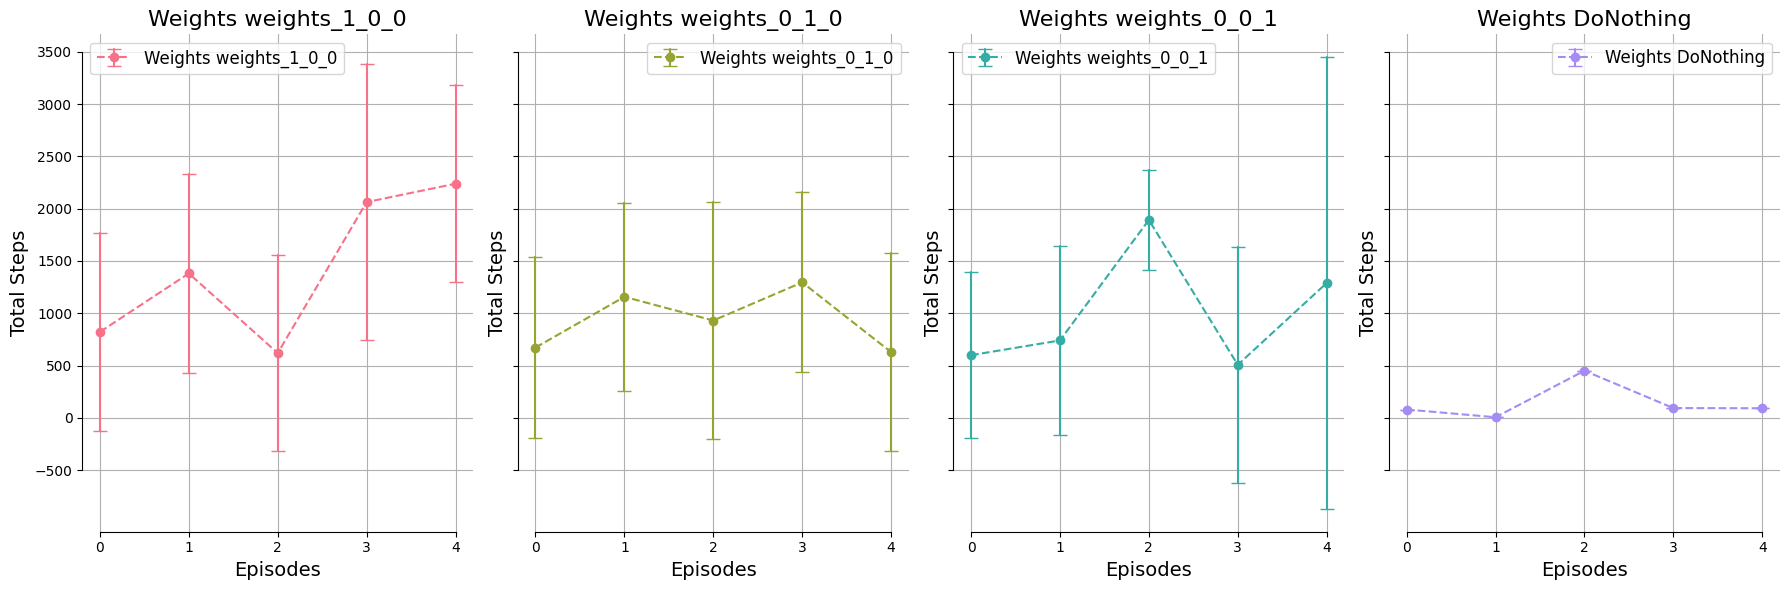

In [10]:
plot_mean_std_total_steps(total_steps_dict=total_steps_dict, num_episodes=num_episodes)
plt.show()

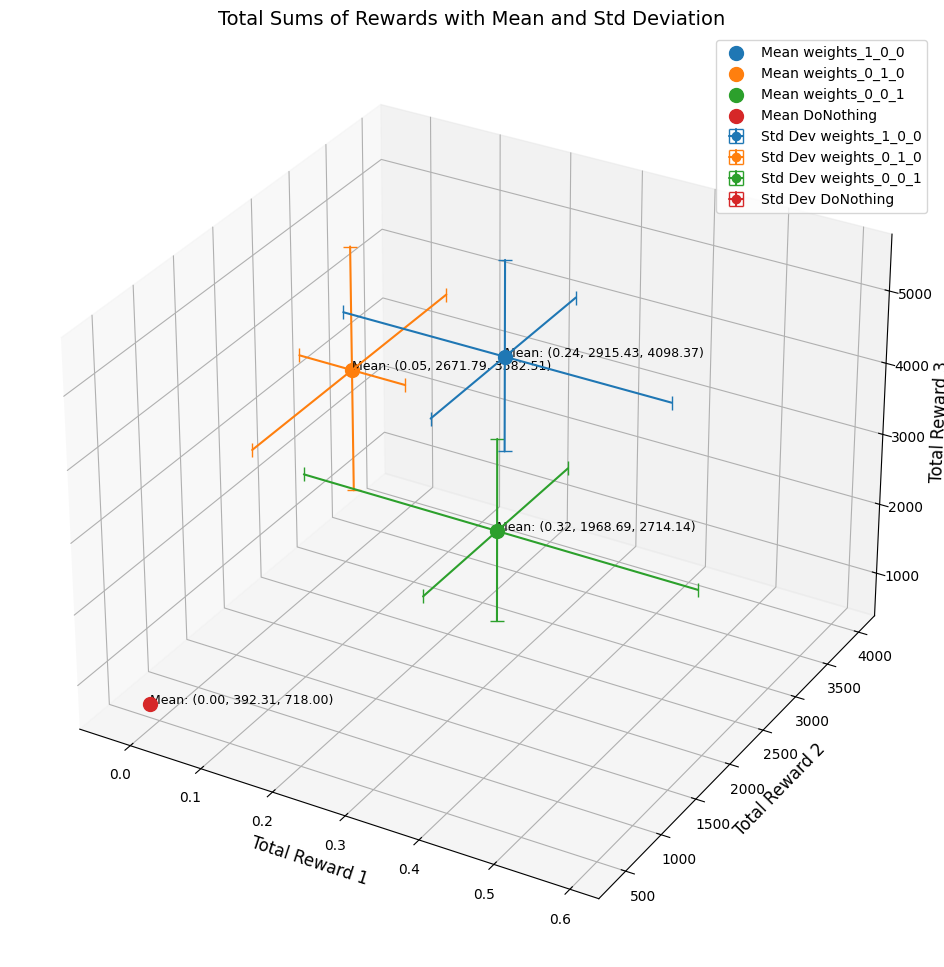

In [11]:
plot_3d_mean_std(returns_dict=rewards_dict)
plt.show()

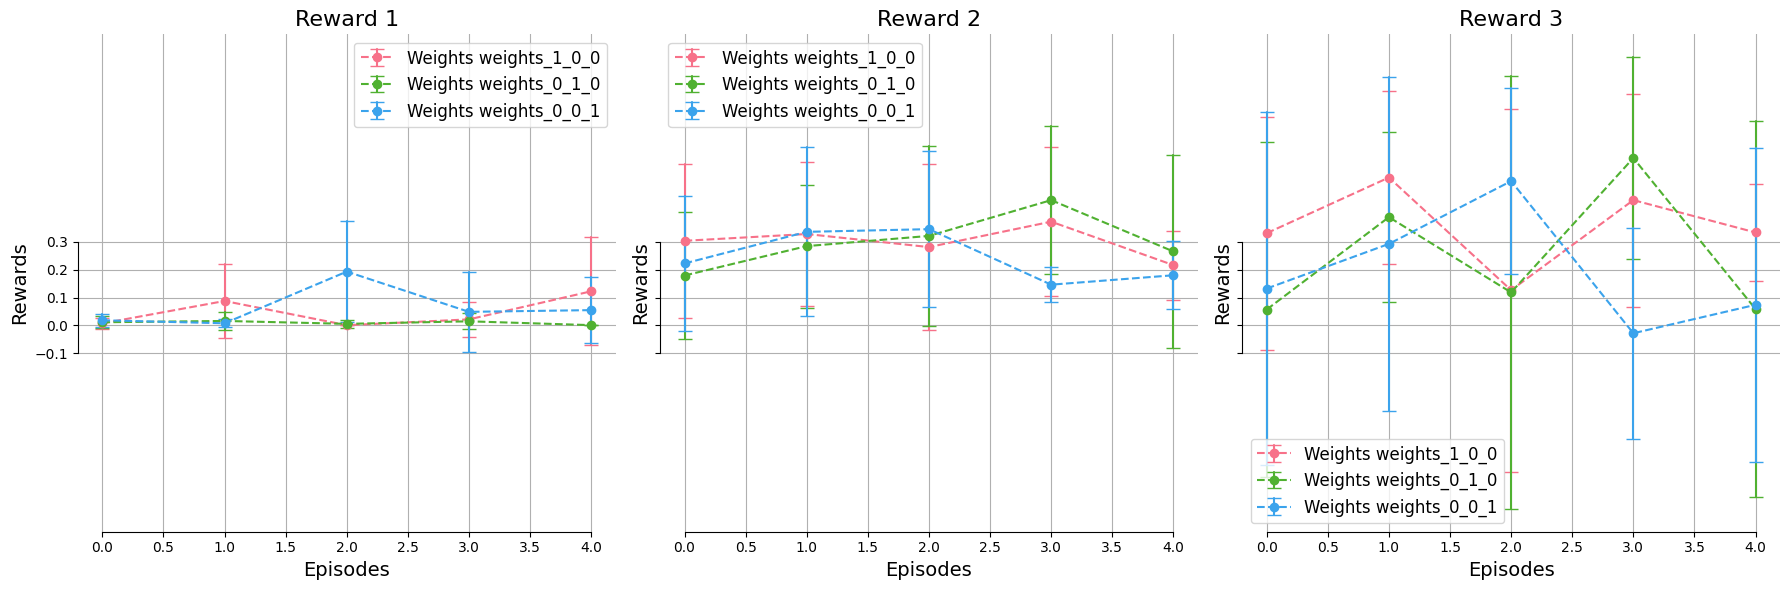

In [12]:
plot_mean_std_rewards(returns_dict=normalized_rewards_dict, reward_dim=reward_dim)
plt.show()